<a href="https://colab.research.google.com/github/jhermosillo/Escuela_CD_IMATE_2019/blob/master/Wiki_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3><center>
    
## **Modelado de texto usando técnicas de reducción de dimensionalidad.**
### Aplicación en WikiPedia para medir semejanza entre documentos.
    
</center></h3>
<h5><center>
    Dr. Jorge Hermosillo Valadez<br>
    Centro de Investigación en Ciencias<br>
    Universidad Autónoma del Estado de Morelos<br>
</center></h5>
<h1><center>
<img src="https://github.com/labsemco/EVIA-UAEM/blob/main/Representaciones%20Incrustadas/PRACTICA%20PCA-W2V/img/CINC_TRANSP.png?raw=1" width="100"/>
<img src="https://github.com/labsemco/EVIA-UAEM/blob/main/Representaciones%20Incrustadas/PRACTICA%20PCA-W2V/img/UAEM_COLOR_2.png?raw=1" width="100"/>
</center></h1>

Descubrir temas es útil para diversos fines, como agrupar documentos, organizar contenido disponible en línea para recuperar información y hacer recomendaciones. El modelado de temas es una técnica de minería de texto que proporciona métodos para identificar palabras clave concurrentes, con el fin de resumir grandes colecciones de información textual. Ayuda a descubrir temas ocultos en el documento, anotar los documentos con estos temas y organizar una gran cantidad de datos no estructurados. Numerosos proveedores de contenido y agencias de noticias están utilizando modelos de temas para recomendar artículos a los lectores.

Utilizaremos dos técnicas de reducción de dimensionalidad, PCA (Principal Component Analysis) y LSA (Latent Semantic Analysis), con el propósito de modelar documentos y establecer semejanzas entre ellos.

Ambas técnicas utilizan el modelo de bolsa de palabras (BoW -- Bag of words), que da como resultado una matriz documento-término que representa documentos en función del conteo de términos. Como veremos, PCA y LSA guardan una estrecha relación. La diferencia básica es que el primero hace un pre-procesamiento de los datos mediante el centrado de las observaciones.

En este curso veremos cómo:
* Leer documentos de la wikipedia (raw)
* Construir una matriz BoW sobre de ellos
* Aplicar PCA y LSA sobre esta matriz
* Comparar el desempeño de ambos métodos analizando la semejanza entre documentos

En términos generales, el proceso que vamos a seguir es lo siguiente:

![Proceso](https://github.com/labsemco/EVIA-UAEM/blob/main/Representaciones%20Incrustadas/PRACTICA%20PCA-W2V/img/BOW.png?raw=1)

# Módulos necesarios

## **Sólo para COLAB**

In [ ]:
import wiki as wi

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import numpy as np
import glob

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Para ahorrar tiempo...

In [ ]:
wi.mas_RAM_porfavor()

# **Cargado de archivo Wikipedia**

Dato informativo: para este curso primero descargamos los archivos raw de wikipedia (https://www.cs.upc.edu/~nlp/wikicorpus/). Estos archivos son tipo texto.

**Para propósitos de este curso, solo usamos un par de archivos cada uno con varios miles de documentos.**

In [ ]:
archivos = glob.glob('/content/datos/textosWiki_1')
print(archivos)

['/content/datos/textosWiki_1']


Leemos los archivos descargados y sus nombres.

In [ ]:
file,nombres = wi.carga_datos(archivos)

leyendo...
/content/datos/textosWiki_1
tamaño del contenido de archivos cargados:             12 MB


Verificamos algunos datos

In [ ]:
print(file[0][:20],file[0][-20:])

['<doc', 'id="1871762"', 'title="jud', 'buechler"', 'nonfiltered="1"', 'processed="1"', 'dbindex="435001">', 'judson', 'donald', 'buechler', '(nacido', 'el', '19', 'de', 'junio', 'de', '1968', 'en', 'san', 'diego'] ['sostiene', 'que,', 'para', 'todas', 'las', 'personas,', 'ese', 'criterio', 'imparcial', 'se', 'aplica', 'en', 'forma', 'homogénea.', 'véase', 'también', '.', 'objetividad;', 'endofarticle.', '</doc>']


# **Extracción de documentos**

Ahora vamos a identificar cada documento y elaborar una lista de los mismos.
Para ello, se debe tener en cuenta la forma en que se indexan listas y arreglos en Python.

Como hemos visto, los archivos de Wikipedia traen el identificador de documento ```id=``` (p.ej. _id="1842224"_) y marcadores de inicio y fin de documento, que se reconocen por el caracter ```">"``` (p.ej. _dbindex="430000">_ y ```</doc>```).

__Lo que vamos a hacer es obtener los indices en donde se encuentran estos datos para extraer el id de documento y su contenido textual__. Esto con el fin de construir una lista de documentos.

Los textos se limpian y procesan usando el módulo ```nltk``` (Natural Language ToolKit) (Loper and Bird, 2002).

Al final tendremos una lista cuyo contenido será como sigue:

```
docs->[[id_doc1,texto del documento doc1],[id_doc2,texto del documento doc2], ... ]
```

In [ ]:
docs = wi.lee_documentos(file,nombres)

archivo /content/datos/textosWiki_1 contiene 4753        documentos 



In [ ]:
print('Se leyeron {} archivos'.format(len(docs)))
print(docs[0][0][0],docs[0][0][1][:100])

Se leyeron 1 archivos
1871762 judson donald buechler nacido junio san diego california california unidos jugador profesional ameri


# **Data Frame de documentos**

Ahora vamos a usar pandas (McKinney & others, 2010) para crear un DataFrame que es una estructura de datos especialmente diseñada para manipular grandes cantidades de datos de manera ágil y eficiente.

In [ ]:
df_0 = pd.DataFrame(docs[0],columns = ['doc_id','Texto','clase'])
#df_1 = pd.DataFrame(docs[1],columns = ['doc_id','Texto','clase'])
print(len(df_0.index),'documentos clase 0')
#print(len(df_1.index),'documentos clase 1')
df = df_0
#df = pd.concat([df_0, df_1], ignore_index=True, sort=False)
print(df.shape)
df.head()

4753 documentos clase 0
(4753, 3)


,doc_id,Texto,clase
0,1871762,judson donald buechler nacido junio san diego ...,0
1,1871768,lost highway the concert dvd recoge concierto ...,0
2,1871769,eburones tribu descendencia germánica habitaro...,0
3,1871771,aguada baixo portuguesa águeda km² área habita...,0
4,1871772,selge griego importante ciudad pisidia ladera ...,0


## **Extracción de características**

Tratemos de visualizar algunas propiedades de los documentos.

Para ello vamos a utilizar un contador ([Counter](https://docs.python.org/2/library/collections.html)). Un contador es un contenedor que almacena elementos como claves de diccionario, y sus recuentos se almacenan como valores de diccionario.

Construiremos una columna con el conteo de palabras por documento y otra con la palabra más frecuente en el documento.

Para visualizar estos datos utilizaremos [matplotlib](https://matplotlib.org/) (Hunter, 2007).

John D. Hunter. Matplotlib: A 2D Graphics Environment, _Computing in Science & Engineering, 9, 90-95 (2007)_, DOI:10.1109/MCSE.2007.55 (publisher link)

In [ ]:
from collections import Counter  #regresa un diccionario con conteos

df['Palabras']=df['Texto'].apply(lambda x: x.split())
df['Total']=df['Palabras'].apply(lambda x: len(x))
df['Conteos']=df['Palabras'].apply(lambda x: Counter(x))

df=df.sort_values(by="Total",ascending=False)

df.index = range(len(df.index))
df.head()

,doc_id,Texto,clase,Palabras,Total,Conteos
0,1889137,invasiones japonesas corea conflicto bélico de...,0,"[invasiones, japonesas, corea, conflicto, béli...",7549,"{'invasiones': 6, 'japonesas': 31, 'corea': 69..."
1,1889938,cartapuebla oviedo documento concedido ciudad ...,0,"[cartapuebla, oviedo, documento, concedido, ci...",5280,"{'cartapuebla': 1, 'oviedo': 26, 'documento': ..."
2,1881683,historia sal trata uso comercio dado siglos ún...,0,"[historia, sal, trata, uso, comercio, dado, si...",4047,"{'historia': 7, 'sal': 228, 'trata': 1, 'uso':..."
3,1891268,movimiento homófilo segundo movimiento homosex...,0,"[movimiento, homófilo, segundo, movimiento, ho...",3738,"{'movimiento': 26, 'homófilo': 14, 'segundo': ..."
4,1892060,sarah trimmer enero diciembre escritora crític...,0,"[sarah, trimmer, enero, diciembre, escritora, ...",3694,"{'sarah': 16, 'trimmer': 115, 'enero': 2, 'dic..."


# **Reducción del tamaño de las matrices**

Para reducir la complejidad espacial de nuestro ejercicio, podemos hacer dos cosas:
* 1.- Un muestreo aleatorio de documentos, lo que nos ayudaría a reducir el vocabulario.
* 2.- Un recorte en el número de documentos por la cantidad de palabras.
Usaremos el segundo.

Obtenemos el vocabulario.
Para ello vamos a usar el método de tokenización de NLTK

In [ ]:
textos = df['Texto'].values
textos = " ".join(textos)
vocabulario = set(word_tokenize(textos))
print(len(vocabulario),'palabras únicas (tipos)')

103133 palabras únicas (tipos)


Filtramos algunos documentos

In [ ]:
df=df[(df.Total < 2000) & (df.Total > 100)]
print(len(df))
df.index = range(len(df.index))
df.head()

2117


,doc_id,Texto,clase,Palabras,Total,Conteos
0,1886236,taifa valencia taifa balansiya reinos taifas c...,0,"[taifa, valencia, taifa, balansiya, reinos, ta...",1949,"{'taifa': 25, 'valencia': 61, 'balansiya': 4, ..."
1,1878783,deva victrix simplemente deva ciudadfortaleza ...,0,"[deva, victrix, simplemente, deva, ciudadforta...",1893,"{'deva': 19, 'victrix': 16, 'simplemente': 1, ..."
2,1882951,animax latinoamérica complejo tres canales cab...,0,"[animax, latinoamérica, complejo, tres, canale...",1847,"{'animax': 60, 'latinoamérica': 10, 'complejo'..."
3,1888749,serie fílmica superman lista largometrajes per...,0,"[serie, fílmica, superman, lista, largometraje...",1831,"{'serie': 11, 'fílmica': 2, 'superman': 75, 'l..."
4,1880333,rock rolinga llamado rock chabón rock stone ro...,0,"[rock, rolinga, llamado, rock, chabón, rock, s...",1829,"{'rock': 67, 'rolinga': 19, 'llamado': 2, 'cha..."


### Guardamos el data frame

Para ello, vamos a usar [pickle](https://docs.python.org/2/library/pickle.html), que forma parte de las [funcionalidades de I/O](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) de Pandas.

Pickle permite serializar y deserializar una estructura de datos Python. "_Pickling_" es el proceso mediante el cual una jerarquía de objetos de Python se convierte en una secuencia de bytes, y "_Depickling_" es la operación inversa, mediante la cual una secuencia de bytes se convierte nuevamente en una jerarquía de objetos.

In [ ]:
df.loc[2].Texto

'animax latinoamérica complejo tres canales cable lanzado julio señales latinoamérica brasil reemplazando canal locomotion igual filiales asia inició proyecto canal transmite únicamente series anime aunque recientemente confirmó emitira películas distribuidas sony pictures mayo estudios animax latinoamérica estan ubicados caracas venezuela igual estudios canales hermanos sony entertainment television axn pertenece sony pictures television international estructura señales complejo cuenta feeds lugares transmisión masivos cuales transmite programación señal venezuela señal brasil señal señal genérica disponible resto países latinoamérica historia siendo primer intento sony brindar canal exclusivo anime horas latinoamérica pensó poner series formatos series contuvieran capítulos transmitidas días mientras aquellas cantidad menor emitirían ciertos días semana mismo modo transmitidas japón total puede encontrar solo día capítulo estreno cualquier serie mínimo repeticiones final cada serie p

In [ ]:
#df.to_pickle('/content/datos/data_frame_4K.pkl')

<hr/>
<hr/>

# Leemos un Data Frame previamente almacenado

In [ ]:
#df=pd.read_pickle('/content/datos/data_frame_4K.pkl')
df.index = range(len(df.index))
print(df.shape)
df.head()

(2117, 6)


,doc_id,Texto,clase,Palabras,Total,Conteos
0,1886236,taifa valencia taifa balansiya reinos taifas c...,0,"[taifa, valencia, taifa, balansiya, reinos, ta...",1949,"{'taifa': 25, 'valencia': 61, 'balansiya': 4, ..."
1,1878783,deva victrix simplemente deva ciudadfortaleza ...,0,"[deva, victrix, simplemente, deva, ciudadforta...",1893,"{'deva': 19, 'victrix': 16, 'simplemente': 1, ..."
2,1882951,animax latinoamérica complejo tres canales cab...,0,"[animax, latinoamérica, complejo, tres, canale...",1847,"{'animax': 60, 'latinoamérica': 10, 'complejo'..."
3,1888749,serie fílmica superman lista largometrajes per...,0,"[serie, fílmica, superman, lista, largometraje...",1831,"{'serie': 11, 'fílmica': 2, 'superman': 75, 'l..."
4,1880333,rock rolinga llamado rock chabón rock stone ro...,0,"[rock, rolinga, llamado, rock, chabón, rock, s...",1829,"{'rock': 67, 'rolinga': 19, 'llamado': 2, 'cha..."


# **BoW**

Para obtener la Bolsa de Palabras, vamos a utilizar la columna de Conteos con los conteos de palabras respectivos por cada documento.

Esta columna consta de diccionarios que usaremos como entrada para el módulo [DictVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html), que transforma diccionarios en arreglos Numpy.

Antes, vamos a definir nuestra función BOW. Esta función recibe una lista de diccionarios y regresa una matriz $X$ de documentos y un diccionario $v$ con el vocabulario asociado a un entero.

**Cada fila de $X$ es un documento y cada columna representa una palabra del vocabulario.**

<img src="https://github.com/labsemco/EVIA-UAEM/blob/main/Representaciones%20Incrustadas/PRACTICA%20PCA-W2V/img/BoW_M.png?raw=1" width="300"/>

In [ ]:
from sklearn.feature_extraction import DictVectorizer
from collections import Counter, OrderedDict

def bow_(docs):
    v = DictVectorizer(sparse=False)
    X = v.fit_transform(docs)
    return X,v

In [ ]:
docs = df.Conteos.tolist()
X,vocab_ = bow_(docs)
print(X.shape)

(2117, 87310)


In [ ]:
print('X:')
print(X[:2])
print('La primer fila de la matriz X suma {} conteos que coincide con el primer documento.'.format(int(X[0].sum())))
print('La segunda fila de la matriz X suma {} conteos que coincide con el segundo documento.'.format(int(X[1].sum())))

X:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
La primer fila de la matriz X suma 1949 conteos que coincide con el primer documento.
La segunda fila de la matriz X suma 1893 conteos que coincide con el segundo documento.


# **Métodos de reducción de dimensionalidad y codificación latente**

El análisis de componentes principales (PCA) y la descomposición de valores singulares (SVD) son enfoques de reducción de dimensionalidad comúnmente utilizados en el análisis de datos exploratorios y el aprendizaje automático.

Ambos son métodos clásicos de reducción de dimensionalidad lineal que intentan encontrar combinaciones lineales de características en la matriz de datos de alta dimensión original para construir una representación significativa del conjunto de datos.

PCA tiene como objetivo encontrar ejes ortogonales linealmente no correlacionados, que también se conocen como componentes principales (PC) en el espacio dimensional m (espacio de las características &mdash;_features_) para proyectar los puntos de datos en esas PC. La primera PC captura la mayor variación en los datos.

<img src="https://github.com/labsemco/EVIA-UAEM/blob/main/Representaciones%20Incrustadas/PRACTICA%20PCA-W2V/img/PCA.gif?raw=1" width="375" height="375"/>

Las representaciones resultantes de PCA y SVD son similares para algunos datos, ya que PCA y SVD están estrechamente relacionados. Si tenemos:

<img src="https://github.com/labsemco/EVIA-UAEM/blob/main/Representaciones%20Incrustadas/PRACTICA%20PCA-W2V/img/PCA_SVD-1.png?raw=1" width="75"/>

donde, $\mathbf{x}_i=[x_1,x_2,\cdots,x_d]$ son muestras observadas de datos $d-$dimensionales, $d\in \mathbb{N}$.

Los $k$ _ejes principales_ $\mathbf{w}_j$, $j \in \{1,\cdots,k\}$, son aquellos ejes ortonormales sobre los cuales la varianza de la proyección es máxima.

**¿Por qué la varianza?**:
Se puede considerar cualquier conjunto de observaciones como una señal contaminada con ruido. Lo deseable es maximizar la razón señal-a-ruido (SNR):
<center>
$SNR=\frac{\sigma^2_{senal}}{\sigma^2_{ruido}}$
</center>

Esto es equivalente a encontrar una transformación que permita proyectar las observaciones sobre ejes que maximicen la varianza de los datos y minimicen la varianza del ruido.

Visto de otra forma, se desea encontrar ejes de proyección de los datos en donde haya la **menor** redundancia (i.e. correlación) posible; es decir, ejes en donde la varianza de la señal sea máxima y su correlación con respecto a otros ejes ("ruido") sea mínima:

<img src="https://github.com/labsemco/EVIA-UAEM/blob/main/Representaciones%20Incrustadas/PRACTICA%20PCA-W2V/img/COV.png?raw=1" width="350"/>

Se puede demostrar que estos ejes $\mathbf{w}_j$ están dados por los $k$ vectores propios dominantes (i.e. los asociados con los valores propios más grandes) de la matriz de covarianza de las muestras
<center>
$\mathbf{S}=\sum_{i}(\mathbf{x}_i-\bar{\mathbf{x}})(\mathbf{x}_i-\bar{\mathbf{x}})^{^\textrm{T}}/N$
</center>
donde $\bar{\mathbf{x}}$ es la media de las muestras, de tal forma que
<center>
$\mathbf{S}\mathbf{w}_j=\lambda_j\mathbf{w}_j$.
</center>

Escribiendo $\mathbf{P}=\mathbf{W}^{^\textrm{T}}$, las $k$ componentes principales del vector observado $\mathbf{x}_n$ están dadas por el vector:
<center>
$\mathbf{p}_n=\mathbf{P}\,(\mathbf{x}_n-\bar{\mathbf{x}})$.
</center>

De esta forma, las filas de $\mathbf{P}$ son _las componentes principales_ de $\mathbf{X}$ y constituyen una nueva base sobre la que se pueden proyectar los vectores $\mathbf{x}_n$:
<center>
$\mathbf{Y}=\mathbf{P}\,\mathbf{X}$.
</center>




<img src="https://github.com/labsemco/EVIA-UAEM/blob/main/Representaciones%20Incrustadas/PRACTICA%20PCA-W2V/img/PCA_3.png?raw=1" width="400"/>
<em><center>Proyección de la matriz original en el espacio de componentes principales (Tharwat, 2016)</em></center>

# **PCA**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver='auto')

Y_pca = pca.fit_transform(X)

In [ ]:
np.save('/content/datos/Y_pca.npy', Y_pca)

In [ ]:
Y_pca = np.load('/content/datos/Y_pca.npy')

In [ ]:
ypca=wi.get_dataFrame(Y_pca,df)
print(ypca.shape)
ypca.head()

(2117, 2118)


,doc_id,0,1,2,3,4,5,6,7,8,...,2107,2108,2109,2110,2111,2112,2113,2114,2115,2116
0,1886236,34.667066,-12.984012,13.877527,-37.671358,-36.442694,29.144963,1.737064,-19.772097,41.568617,...,-0.000661,-0.005840,0.004151,-0.001203,0.000534,0.000133,0.000774,-0.000288,0.000206,2.897449e-14
1,1878783,27.946174,-10.686381,4.886106,-8.338179,-2.509764,14.033504,8.787661,-0.564707,1.791961,...,-0.000477,-0.000186,0.000777,0.000498,-0.001188,-0.000430,-0.002359,0.000413,0.000280,2.897449e-14
2,1882951,29.044503,8.726913,-2.665572,7.976274,-0.371256,-3.246004,-2.400909,-1.836405,3.150018,...,0.003261,-0.003848,-0.002813,0.000658,0.000121,-0.000179,-0.000333,-0.000513,0.000151,2.897449e-14
3,1888749,38.545349,12.733390,-28.338375,15.646199,-18.357535,22.209942,-19.150465,-42.320516,-36.488016,...,0.000946,-0.002442,-0.002349,-0.001185,0.000105,-0.000113,-0.000714,0.000029,-0.000160,2.897449e-14
4,1880333,27.146187,2.037198,-19.761532,7.629125,-10.249278,6.881565,-4.867883,8.517203,-1.942729,...,0.002383,0.000137,-0.004406,-0.001401,0.001301,-0.000635,-0.001752,0.001118,0.000256,2.897449e-14


In [ ]:
pca_vr=pca.explained_variance_ratio_
print(pca_vr[:10])

[0.02081826 0.01489535 0.01080003 0.01004601 0.00973465 0.00911906
 0.00898014 0.00886848 0.00837554 0.00825975]


<Axes: title={'center': 'Distribucion de Varianzas'}, xlabel='Componente', ylabel='Proporción'>

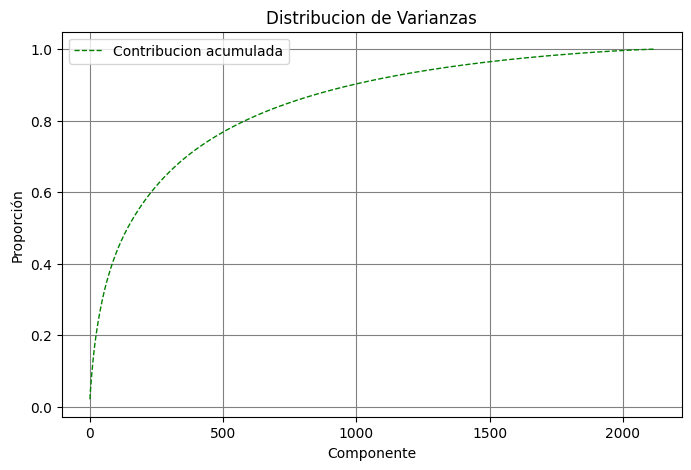

In [ ]:
wi.distribucion_vr(pca_vr)

# **LSA**

**LSA** (Latent Semantic Analysis) utiliza una ponderación de palabras llamada $\textit{tf}$-$\textit{idf}$.

Tf-idf (del inglés Term frequency – Inverse document frequency), frecuencia de término – frecuencia inversa de documento (o sea, la frecuencia de ocurrencia del término en la colección de documentos), es una medida numérica que expresa cuán relevante es una palabra para un documento en una colección.

Esta medida se utiliza a menudo como un factor de ponderación en la recuperación de información y la minería de texto. El valor tf-idf aumenta proporcionalmente al número de veces que una palabra aparece en el documento, pero es compensada por la frecuencia de la palabra en la colección de documentos, lo que permite manejar el hecho de que algunas palabras son generalmente más comunes que otras.

$\textit{tf}\,(t,d) = \frac{f(t,d)}{\max\{f(t,d):t\in d\}}$

$\textit{idf}\,(t,D) = \log\frac{|D|}{1+|\{d\in D:t \in d\}|}$

TF-IDF=$\textit{tf}\times \textit{idf}$

LSI utiliza la Descomposición en Valores Singulares (Singular Value Decomposition) o SVD para calcular tres matrices como sigue (Baker, 2005):
<center>
$\mathbf{X}_{nd}=\mathbf{U}_{nn}\,\mathbf{D}_{nd}\,\mathbf{W}^{^\textrm{T}}_{dd}$
</center>

donde $\mathbf{U}\,\mathbf{U}^{^\textrm{T}}=\mathbf{I}$, $\mathbf{V}\,\mathbf{V}^{^\textrm{T}}=\mathbf{I}$; las columnas de $\mathbf{U}$ son los vectores propios ortonormales de $\mathbf{X}\,\mathbf{X}^{^\textrm{T}}$, las columnas de $\mathbf{W}$ son los vectores propios ortonormales de $\mathbf{X}^{^\textrm{T}}\,\mathbf{X}$, y $\mathbf{D}$ es una matriz diagonal que contiene las raíces cuadradas de los vectores propios de $\mathbf{U}$ o $\mathbf{W}$ en orden descendiente.

**Nota** que PCA puede obtenerse a partir de SVD. Una diferencia importante es que SVD no necesita centrar los datos.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

q=300  #Elegimos usar q componentes
svd = TruncatedSVD(n_components=q, n_iter=7, random_state=42)

vectorizer = TfidfVectorizer(vocabulary=vocab_.vocabulary_)

corpus = df.Texto.tolist()
D_tfidf = vectorizer.fit_transform(corpus)
print(D_tfidf[:2])

  (0, 87290)	0.018633205177554027
  (0, 87261)	0.00740826338103206
  (0, 87152)	0.004770898699995504
  (0, 87057)	0.006528061131078193
  (0, 87055)	0.005163242617988802
  (0, 87053)	0.007063550381046937
  (0, 87045)	0.00744761401053846
  (0, 87026)	0.007225863429205504
  (0, 87001)	0.013890884941485451
  (0, 86688)	0.00929260959228522
  (0, 86526)	0.07808272221775117
  (0, 86521)	0.3525888949912995
  (0, 86488)	0.043563504703062764
  (0, 86416)	0.011752963166376649
  (0, 86175)	0.010400920154361542
  (0, 86099)	0.011752963166376649
  (0, 86025)	0.009904434791762366
  (0, 86019)	0.023505926332753297
  (0, 86015)	0.011154674602535882
  (0, 85916)	0.006917335694142518
  (0, 85233)	0.004757955098081061
  (0, 84946)	0.003804430964946607
  (0, 84756)	0.006784312237201805
  (0, 84752)	0.008881653736390131
  (0, 84512)	0.008086331436419174
  :	:
  (1, 1310)	0.04230948949452932
  (1, 1248)	0.00979329192288452
  (1, 1218)	0.011539754253858068
  (1, 1074)	0.013316805473219905
  (1, 1024)	0.006394

In [ ]:
dlsa=svd.fit_transform(D_tfidf)

In [ ]:
#dlsa = np.load('/content/datos/dlsa.npy')

In [ ]:
dlsa=wi.get_dataFrame(dlsa,df)
print(dlsa.shape)
dlsa.head()

(2117, 301)


,doc_id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,1886236,0.144606,-0.035454,-0.027174,-0.065392,-0.050102,0.021952,0.025118,-0.015155,-0.034800,...,-0.013656,0.003250,-0.004791,0.004599,0.007188,0.015899,0.009976,-0.011148,0.013769,-0.018902
1,1878783,0.196944,-0.070551,0.023415,-0.087179,-0.036223,-0.043035,-0.032487,-0.016263,0.020750,...,-0.021022,-0.005959,0.036866,-0.001384,0.000327,-0.010311,-0.027345,0.003721,0.019572,0.007920
2,1882951,0.135209,-0.019949,-0.033558,0.045555,0.009666,0.004139,-0.021153,-0.009239,-0.020196,...,0.057586,-0.034646,-0.010839,0.003405,0.001095,0.014104,-0.017087,-0.002599,-0.031880,0.004770
3,1888749,0.148258,-0.016088,-0.044650,0.059701,0.005284,0.005766,-0.021263,-0.018914,-0.047110,...,-0.025677,-0.045258,0.000743,0.003936,-0.005705,0.007806,0.012971,-0.023004,0.037212,0.037271
4,1880333,0.170300,-0.014052,-0.078178,0.082517,0.066849,-0.036881,0.044592,-0.020503,0.012222,...,-0.026260,0.015500,-0.063230,0.040825,-0.007310,-0.004958,0.018011,0.022304,-0.017743,0.022114


In [ ]:
svd_vr=svd.explained_variance_ratio_
print(svd_vr[:10])

[0.00159744 0.00520876 0.00451913 0.00396199 0.00383483 0.00337484
 0.00311687 0.00300636 0.00293691 0.00286029]


<Axes: title={'center': 'Distribucion de Varianzas'}, xlabel='Componente', ylabel='Proporción'>

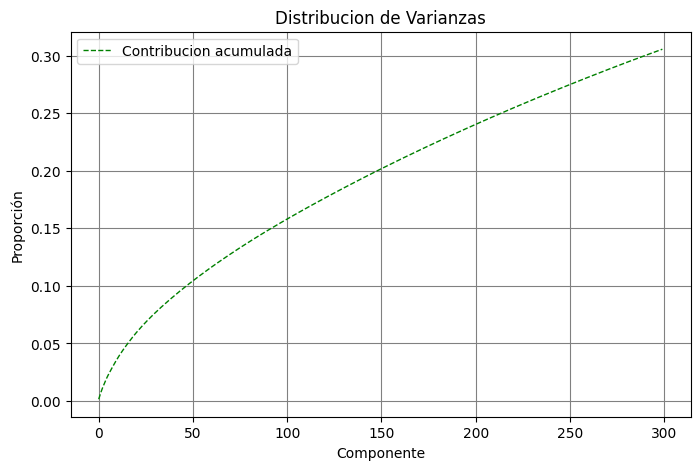

In [ ]:
wi.distribucion_vr(svd_vr)

# **Ejercicio**

Queremos saber que tan bien podemos modelar documentos utilizando estas técnicas de reducción de dimensionalidad.

Observa la distribución de los componentes principales de la matriz BoW, calculados por PCA y por LSI.

Elige un número $q$ de componentes principales (que llamaremos _representativos_) para PCA y compara la calidad de los documentos más cercanos (semejantes) a los documentos de análisis mostrados aquí abajo.

### Documentos de análisis

In [ ]:
docus = df[(df['doc_id']=='1023628') |\
           (df['doc_id']=='1024447') |\
           (df['doc_id']=='1035967') |\
           (df['doc_id']=='1891029') |\
           (df['doc_id']=='1894599') ].\
            drop(columns=['Total','Conteos','Palabras','clase'])
docus.index=range(len(docus.index))

docus.head()

,doc_id,Texto
0,1891029,accidente trenes chatsworth ángeles accidente ...
1,1894599,tomás teresa atleta español nacido santona pro...


### Análisis usando PCA

In [ ]:
q=300  #elige un numero q de componentes principales
pca_rep=wi.get_representativos(ypca,q)
print(pca_rep.shape)
pca_rep.head()

(2117, 301)


,doc_id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,1886236,34.667066,-12.984012,13.877527,-37.671358,-36.442694,29.144963,1.737064,-19.772097,41.568617,...,0.229819,0.018578,-0.411935,1.288640,-0.330328,-0.216317,0.389133,0.155464,1.180248,-0.153494
1,1878783,27.946174,-10.686381,4.886106,-8.338179,-2.509764,14.033504,8.787661,-0.564707,1.791961,...,0.211121,-0.181971,-0.503814,0.703834,-0.403940,0.070280,0.274179,0.432363,0.112487,-0.038941
2,1882951,29.044503,8.726913,-2.665572,7.976274,-0.371256,-3.246004,-2.400909,-1.836405,3.150018,...,0.106994,-0.363112,0.429866,-0.235054,0.405796,0.397058,-0.321569,-0.275101,-0.795142,-0.674096
3,1888749,38.545349,12.733390,-28.338375,15.646199,-18.357535,22.209942,-19.150465,-42.320516,-36.488016,...,0.058318,-0.095661,0.504815,-0.242656,0.196575,0.020748,0.075164,-0.172821,0.108338,0.249039
4,1880333,27.146187,2.037198,-19.761532,7.629125,-10.249278,6.881565,-4.867883,8.517203,-1.942729,...,-0.094882,-0.110592,-0.375288,-0.619430,-0.242886,0.193911,-0.311922,-0.463286,0.626111,0.293806


Modelamos los documentos utilizando las componentes principales

In [ ]:
edf_pca=wi.modela_documentos_rep(pca_rep)
print(edf_pca.shape)
edf_pca.head()

(2117, 2)


,doc_id,Vectores
0,1886236,"[34.6670663447766, -12.984012366433749, 13.877..."
1,1878783,"[27.946173796688743, -10.686381057797876, 4.88..."
2,1882951,"[29.04450329540758, 8.726912890152908, -2.6655..."
3,1888749,"[38.54534881788138, 12.73339022422966, -28.338..."
4,1880333,"[27.146187237299518, 2.037198261801687, -19.76..."


Calculamos el vecino más cercano a cada uno de los documentos de análisis

In [ ]:
k=1
vecinos_pca=wi.k_vecinos_mas_cercanos(docus,edf_pca,k)

Por cada documento de análisis, podemos ver qué documento es el más semejante (el vecino más cercano)

In [ ]:
print(vecinos_pca['1891029'])

[['1892108', 42.88378811737678]]


Traemos los textos correspondientes y comparamos

In [ ]:
test1=df[df['doc_id']=='1891029'].Texto.values[0][:400]
test2=df[df['doc_id']=='1887192'].Texto.values[0][:400]
print(test1)
print(test2)

accidente trenes chatsworth ángeles accidente ferroviario ocurrió septiembre pdt gmt distrito chatsworth ángeles california unidos colisión accidente ferroviario mortífero unidos desastre ferroviario big bayou canot causas motivos choque aún esclarecido tyrell especificó abc locomotora jalando tren metrolink fuerza colisión parecer empujó pesada locomotora primer vagón pasajeros volcó lado trenes 
hugo salas wenzel general ejército chileno presidencia augusto pinochet agosto primer oficial militar mayor condenado cadena perpetua violaciones derechos humanos chile años salas director central nacional información cni servicio inteligencia chile reemplazó célebre dina tiempo organización implicada campaña antisubversión conocida operación albania matanza corpus christi junio parte operación do


Podemos repetir el proceso con los demás documentos de análisis

In [ ]:
print(vecinos_pca['1891029'])

[['1892108', 42.88378811737678]]


In [ ]:
test1=df[df['doc_id']=='1891029'].Texto.values[0][:400]
test2=df[df['doc_id']=='1875751'].Texto.values[0][:400]
print(test1)
print(test2)

accidente trenes chatsworth ángeles accidente ferroviario ocurrió septiembre pdt gmt distrito chatsworth ángeles california unidos colisión accidente ferroviario mortífero unidos desastre ferroviario big bayou canot causas motivos choque aún esclarecido tyrell especificó abc locomotora jalando tren metrolink fuerza colisión parecer empujó pesada locomotora primer vagón pasajeros volcó lado trenes 
caio duilio acorazado italiano clase andrea doria sirvió regia marina primera guerra mundial segunda guerra mundial recibía nombre honor comandante flota romana gaius duilius construcción construido acorazado toneladas cañiones junto gemelo sufrió gran reestructuración convirtieron dos buques nuevos distintos incluía capacidad portar hidroaviones cambios recibieron cada cañones substituir anterior


### Análisis usando LSA

In [ ]:
q=300  #debe ser <= 300 o debes correr de nuevo el algoritmo más arriba
lsa_rep=wi.get_representativos(dlsa,q)
print(lsa_rep.shape)
lsa_rep.head()

(2117, 301)


,doc_id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,1886236,0.144606,-0.035454,-0.027174,-0.065392,-0.050102,0.021952,0.025118,-0.015155,-0.034800,...,-0.013656,0.003250,-0.004791,0.004599,0.007188,0.015899,0.009976,-0.011148,0.013769,-0.018902
1,1878783,0.196944,-0.070551,0.023415,-0.087179,-0.036223,-0.043035,-0.032487,-0.016263,0.020750,...,-0.021022,-0.005959,0.036866,-0.001384,0.000327,-0.010311,-0.027345,0.003721,0.019572,0.007920
2,1882951,0.135209,-0.019949,-0.033558,0.045555,0.009666,0.004139,-0.021153,-0.009239,-0.020196,...,0.057586,-0.034646,-0.010839,0.003405,0.001095,0.014104,-0.017087,-0.002599,-0.031880,0.004770
3,1888749,0.148258,-0.016088,-0.044650,0.059701,0.005284,0.005766,-0.021263,-0.018914,-0.047110,...,-0.025677,-0.045258,0.000743,0.003936,-0.005705,0.007806,0.012971,-0.023004,0.037212,0.037271
4,1880333,0.170300,-0.014052,-0.078178,0.082517,0.066849,-0.036881,0.044592,-0.020503,0.012222,...,-0.026260,0.015500,-0.063230,0.040825,-0.007310,-0.004958,0.018011,0.022304,-0.017743,0.022114


In [ ]:
edf_lsa=wi.modela_documentos_rep(lsa_rep)
print(edf_lsa.shape)
edf_lsa.head()

(2117, 2)


,doc_id,Vectores
0,1886236,"[0.14460559304228576, -0.03545442672860715, -0..."
1,1878783,"[0.19694370369382522, -0.07055061062639882, 0...."
2,1882951,"[0.13520895423487816, -0.01994867984032684, -0..."
3,1888749,"[0.1482577101780329, -0.016088363657322233, -0..."
4,1880333,"[0.17029982503162464, -0.014052109317783432, -..."


In [ ]:
k=1
vecinos_lsa=wi.k_vecinos_mas_cercanos(docus,edf_lsa,k)

In [ ]:
print(vecinos_lsa['1891029'])

[['1892108', 0.380420015885697]]


In [ ]:
test1=df[df['doc_id']=='1891029'].Texto.values[0][:400]
test2=df[df['doc_id']=='1880333'].Texto.values[0][:400]
print(test1)
print(test2)

accidente trenes chatsworth ángeles accidente ferroviario ocurrió septiembre pdt gmt distrito chatsworth ángeles california unidos colisión accidente ferroviario mortífero unidos desastre ferroviario big bayou canot causas motivos choque aún esclarecido tyrell especificó abc locomotora jalando tren metrolink fuerza colisión parecer empujó pesada locomotora primer vagón pasajeros volcó lado trenes 
rock rolinga llamado rock chabón rock stone rock cabeza rock barrial fenómeno rock and roll netamente argentino basa simplificadamente estilo visual musical banda inglesa rolling stones originando tribu urbana fans misma banda referentes nacionales término rollingas stones generalmente usado llamar tipo fans usualmente origen barrial hoy día argentina bandas rollinga denomina exponentes musicales 


<hr/>
<hr/>

# **Matriz palabra-documento**

Queremos ver ahora si podemos representar documentos utilizando representaciones latentes de palabras

Una forma de representar palabras como vectores de co-ocurrencia en documentos es usando LSI sobre la matriz Palabra-Documento:

<img src="https://github.com/labsemco/EVIA-UAEM/blob/main/Representaciones%20Incrustadas/PRACTICA%20PCA-W2V/img/V.png?raw=1" width="300"/>

## **LSI de Matriz Palabra-Documento**

**Nota que el algoritmo SVD va a representar cada palabra en un vector de dimensión 300.**

In [ ]:
V_TFIDF = D_tfidf.T

vlsa=svd.fit_transform(V_TFIDF)

vlsa = pd.DataFrame(data = vlsa)

print(vlsa.shape)
vlsa.head()

(87310, 300)


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.008221,0.000891,-0.001474,0.001429,0.002581,0.001259,0.002072,-0.001026,-0.003122,-0.002617,...,-0.016658,-0.008499,0.000871,-0.004196,-0.004207,-0.007700,-0.015103,0.023534,0.006410,-0.013124
1,0.003541,-0.001568,-0.002303,0.002481,0.000501,-0.002153,0.000854,-0.003354,0.000398,0.001991,...,0.006845,0.003300,0.005177,-0.003754,-0.003529,-0.004385,0.005303,0.002962,-0.001574,-0.010980
2,0.011521,-0.005945,-0.002128,-0.011133,-0.006739,-0.000975,-0.003204,-0.002465,0.006269,-0.000930,...,-0.000846,-0.001264,0.003178,-0.005361,0.004991,-0.004170,0.008046,0.001621,0.001101,0.001449
3,0.000711,-0.000154,-0.000122,-0.000017,-0.000143,0.000863,0.000970,-0.000410,0.000089,0.000676,...,-0.000017,-0.000050,0.000143,-0.000286,0.000334,-0.000365,0.000648,-0.000395,-0.000051,-0.000105
4,0.000711,-0.000154,-0.000122,-0.000017,-0.000143,0.000863,0.000970,-0.000410,0.000089,0.000676,...,-0.000017,-0.000050,0.000143,-0.000286,0.000334,-0.000365,0.000648,-0.000395,-0.000051,-0.000105


## Índices de las palabras del vocabulario

In [ ]:
vocabulario=vocab_.vocabulary_
vocabulario = OrderedDict(sorted(vocabulario.items(), key=lambda v: v[1]))
print('palabra {:2} índice'.format(''))
for x in list(vocabulario)[:5]:
    print ("{:11}:{:2} ".format(x,vocabulario[x]))

palabra    índice
aaa        : 0 
aac        : 1 
aache      : 2 
aado       : 3 
aaee       : 4 


In [ ]:
edf_vlsa=wi.modela_documentos_w(vlsa,df,vocabulario)
print(edf_vlsa.shape)
edf_vlsa.head()

(2117, 2)


,doc_id,Vectores
0,1886236,"[0.0682696915223101, -0.00962913029107967, -0...."
1,1878783,"[0.07454641829953168, -0.016502525040150658, 0..."
2,1882951,"[0.06642066105119322, -0.0059644117226100085, ..."
3,1888749,"[0.07386807090953709, -0.005170101550601728, -..."
4,1880333,"[0.07065425481641585, -0.0030950473705026677, ..."


## Test con documentos de análisis

In [ ]:
k=1
vecinos_vlsa=wi.k_vecinos_mas_cercanos(docus,edf_vlsa,k)

In [ ]:
print(vecinos_vlsa['1891029'])

[['1900663', 0.06413598301038659]]


In [ ]:
test1=df[df['doc_id']=='1891029'].Texto.values[0][:200]
test2=df[df['doc_id']=='1894767'].Texto.values[0][:200]
print(test1)
print(test2)

accidente trenes chatsworth ángeles accidente ferroviario ocurrió septiembre pdt gmt distrito chatsworth ángeles california unidos colisión accidente ferroviario mortífero unidos desastre ferroviario 
historia tranvías francia data fecha entró servicio primera línea tranvía francesa montrond bains montbrison departamento loira longitud entonces presencia importancia medio transporte ido aumento pro


In [ ]:
print(vecinos_vlsa['1891029'])

[['1900663', 0.06413598301038659]]


In [ ]:
test1=df[df['doc_id']=='1891029'].Texto.values[0][:200]
test2=df[df['doc_id']=='1894767'].Texto.values[0][:200]
print(test1)
print(test2)

accidente trenes chatsworth ángeles accidente ferroviario ocurrió septiembre pdt gmt distrito chatsworth ángeles california unidos colisión accidente ferroviario mortífero unidos desastre ferroviario 
historia tranvías francia data fecha entró servicio primera línea tranvía francesa montrond bains montbrison departamento loira longitud entonces presencia importancia medio transporte ido aumento pro


**Referencias**<br>

Baker, K.. 2005. Singular value decomposition tutorial
The Ohio State University Vol.24

Loper, E. and Bird, S. 2002. NLTK: the Natural Language Toolkit. In _Proceedings of the ACL-02 Workshop on Effective tools and methodologies for teaching natural language processing and computational linguistics - Volume 1 (ETMTNLP '02), Vol. 1_. Association for Computational Linguistics, Stroudsburg, PA, USA, 63-70. DOI: https://doi.org/10.3115/1118108.1118117

McKinney, W., & others. (2010). Data structures for statistical computing in python. In _Proceedings of the 9th Python in Science Conference_ (Vol. 445, pp. 51–56).

Tharwat, A. (2016). Principal component analysis-a tutorial. IJAPR, 3(3), 197-240.